# Binary options put, call statistical research 

This Notebook analyse forex data from EURUSD pair M5 timeframe for the binary options market 
the data is from the duration of january 1st 2020 to december 31st 2020, the aim of this research is to find a pattern 
the placing trades in the binary options markert, in other to accurately predict where a market will close, from 
the previous candles, if it closes above the open price of the candle in question it is a call option, if it closes below it is a put option, when the open price and the close price is the same this is a no trade option which is statistically rare, so this won't be a focal point in this study

In [1]:
#import the relevant packages
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)

In [2]:
#read the data from a csv file
data = pd.read_csv("EURUSD_M5_202001020600_202012030000.csv", sep="\t")
data

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
0,2020.01.02,06:00:00,1.12132,1.12134,1.12128,1.12132,61,0,3
1,2020.01.02,06:05:00,1.12132,1.12134,1.12124,1.12133,55,0,2
2,2020.01.02,06:10:00,1.12133,1.12142,1.12132,1.12142,56,0,2
3,2020.01.02,06:15:00,1.12142,1.12143,1.12137,1.12142,87,0,3
4,2020.01.02,06:20:00,1.12143,1.12143,1.12122,1.12126,68,0,3
...,...,...,...,...,...,...,...,...,...
68938,2020.12.02,23:40:00,1.21166,1.21181,1.21147,1.21178,151,0,1
68939,2020.12.02,23:45:00,1.21176,1.21177,1.21153,1.21166,154,0,1
68940,2020.12.02,23:50:00,1.21168,1.21184,1.21164,1.21172,143,0,1
68941,2020.12.02,23:55:00,1.21172,1.21175,1.21134,1.21136,158,0,1


In [3]:
#drop the <VOL>, column as it is not needed in this research
data.drop("<VOL>", inplace=True, axis=1)

In [4]:
data

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<SPREAD>
0,2020.01.02,06:00:00,1.12132,1.12134,1.12128,1.12132,61,3
1,2020.01.02,06:05:00,1.12132,1.12134,1.12124,1.12133,55,2
2,2020.01.02,06:10:00,1.12133,1.12142,1.12132,1.12142,56,2
3,2020.01.02,06:15:00,1.12142,1.12143,1.12137,1.12142,87,3
4,2020.01.02,06:20:00,1.12143,1.12143,1.12122,1.12126,68,3
...,...,...,...,...,...,...,...,...
68938,2020.12.02,23:40:00,1.21166,1.21181,1.21147,1.21178,151,1
68939,2020.12.02,23:45:00,1.21176,1.21177,1.21153,1.21166,154,1
68940,2020.12.02,23:50:00,1.21168,1.21184,1.21164,1.21172,143,1
68941,2020.12.02,23:55:00,1.21172,1.21175,1.21134,1.21136,158,1


In [5]:
#set call when open price is less than close price
data["<UP>"] = data["<OPEN>"] < data["<CLOSE>"]

In [6]:
#set put when open price is greater than close price
data["<DOWN>"] = data["<OPEN>"] > data["<CLOSE>"]

In [7]:
#no trade when open price is equal to close price
data["<NO_MOVE>"] = data["<OPEN>"] == data["<CLOSE>"]

In [8]:
data

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<SPREAD>,<UP>,<DOWN>,<NO_MOVE>
0,2020.01.02,06:00:00,1.12132,1.12134,1.12128,1.12132,61,3,False,False,True
1,2020.01.02,06:05:00,1.12132,1.12134,1.12124,1.12133,55,2,True,False,False
2,2020.01.02,06:10:00,1.12133,1.12142,1.12132,1.12142,56,2,True,False,False
3,2020.01.02,06:15:00,1.12142,1.12143,1.12137,1.12142,87,3,False,False,True
4,2020.01.02,06:20:00,1.12143,1.12143,1.12122,1.12126,68,3,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
68938,2020.12.02,23:40:00,1.21166,1.21181,1.21147,1.21178,151,1,True,False,False
68939,2020.12.02,23:45:00,1.21176,1.21177,1.21153,1.21166,154,1,False,True,False
68940,2020.12.02,23:50:00,1.21168,1.21184,1.21164,1.21172,143,1,True,False,False
68941,2020.12.02,23:55:00,1.21172,1.21175,1.21134,1.21136,158,1,False,True,False


In [9]:
#convert these columns to type int so they appear as one hot varibles
data[["<UP>", "<DOWN>", "<NO_MOVE>"]] = data[["<UP>", "<DOWN>", "<NO_MOVE>"]].astype("int32")

In [10]:
data

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<SPREAD>,<UP>,<DOWN>,<NO_MOVE>
0,2020.01.02,06:00:00,1.12132,1.12134,1.12128,1.12132,61,3,0,0,1
1,2020.01.02,06:05:00,1.12132,1.12134,1.12124,1.12133,55,2,1,0,0
2,2020.01.02,06:10:00,1.12133,1.12142,1.12132,1.12142,56,2,1,0,0
3,2020.01.02,06:15:00,1.12142,1.12143,1.12137,1.12142,87,3,0,0,1
4,2020.01.02,06:20:00,1.12143,1.12143,1.12122,1.12126,68,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
68938,2020.12.02,23:40:00,1.21166,1.21181,1.21147,1.21178,151,1,1,0,0
68939,2020.12.02,23:45:00,1.21176,1.21177,1.21153,1.21166,154,1,0,1,0
68940,2020.12.02,23:50:00,1.21168,1.21184,1.21164,1.21172,143,1,1,0,0
68941,2020.12.02,23:55:00,1.21172,1.21175,1.21134,1.21136,158,1,0,1,0


In [11]:
open_close = (data["<OPEN>"] - data["<CLOSE>"]) * 100000
open_low = (data["<OPEN>"] - data["<LOW>"]) * 100000
open_high = (data["<OPEN>"] - data["<HIGH>"]) * 100000
close_low = (data["<CLOSE>"] - data["<LOW>"]) * 100000
close_high = (data["<CLOSE>"] - data["<HIGH>"]) * 100000
high_low = (data["<HIGH>"] - data["<LOW>"]) * 100000

In [12]:
#create a dataframe of the subtracted columns
move_df = pd.DataFrame({"open_close" : open_close, 
                        "open_low"   : open_low,
                        "open_high"  : open_high,
                        "close_low"  : close_low,
                        "close_high" : close_high,
                        "high_low"   : high_low, })
move_df

,open_close,open_low,open_high,close_low,close_high,high_low
0,0.0,4.0,-2.0,4.0,-2.0,6.0
1,-1.0,8.0,-2.0,9.0,-1.0,10.0
2,-9.0,1.0,-9.0,10.0,0.0,10.0
3,0.0,5.0,-1.0,5.0,-1.0,6.0
4,17.0,21.0,0.0,4.0,-17.0,21.0
...,...,...,...,...,...,...
68938,-12.0,19.0,-15.0,31.0,-3.0,34.0
68939,10.0,23.0,-1.0,13.0,-11.0,24.0
68940,-4.0,4.0,-16.0,8.0,-12.0,20.0
68941,36.0,38.0,-3.0,2.0,-39.0,41.0


### create a future dataframe to store the next data i.e the candle in question  

In [13]:
future = data.iloc[1:,8:11]

In [14]:
future.columns = ["up*", "down*", "no_move*"]

In [15]:
future.reset_index(inplace=True)
future.drop(["index"], axis = 1, inplace=True)

In [16]:
#concat move_df and future to create a new dataframe
dataset = pd.concat([move_df, future], axis = 1)
dataset

,open_close,open_low,open_high,close_low,close_high,high_low,up*,down*,no_move*
0,0.0,4.0,-2.0,4.0,-2.0,6.0,1.0,0.0,0.0
1,-1.0,8.0,-2.0,9.0,-1.0,10.0,1.0,0.0,0.0
2,-9.0,1.0,-9.0,10.0,0.0,10.0,0.0,0.0,1.0
3,0.0,5.0,-1.0,5.0,-1.0,6.0,0.0,1.0,0.0
4,17.0,21.0,0.0,4.0,-17.0,21.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
68938,-12.0,19.0,-15.0,31.0,-3.0,34.0,0.0,1.0,0.0
68939,10.0,23.0,-1.0,13.0,-11.0,24.0,1.0,0.0,0.0
68940,-4.0,4.0,-16.0,8.0,-12.0,20.0,0.0,1.0,0.0
68941,36.0,38.0,-3.0,2.0,-39.0,41.0,1.0,0.0,0.0


In [17]:
dataset.dropna(inplace=True)

In [18]:
dataset

,open_close,open_low,open_high,close_low,close_high,high_low,up*,down*,no_move*
0,0.0,4.0,-2.0,4.0,-2.0,6.0,1.0,0.0,0.0
1,-1.0,8.0,-2.0,9.0,-1.0,10.0,1.0,0.0,0.0
2,-9.0,1.0,-9.0,10.0,0.0,10.0,0.0,0.0,1.0
3,0.0,5.0,-1.0,5.0,-1.0,6.0,0.0,1.0,0.0
4,17.0,21.0,0.0,4.0,-17.0,21.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
68937,11.0,12.0,-11.0,1.0,-22.0,23.0,1.0,0.0,0.0
68938,-12.0,19.0,-15.0,31.0,-3.0,34.0,0.0,1.0,0.0
68939,10.0,23.0,-1.0,13.0,-11.0,24.0,1.0,0.0,0.0
68940,-4.0,4.0,-16.0,8.0,-12.0,20.0,0.0,1.0,0.0


In [19]:
#get the absolute value of all the data
absolute_data = abs(dataset)
absolute_data

,open_close,open_low,open_high,close_low,close_high,high_low,up*,down*,no_move*
0,0.0,4.0,2.0,4.0,2.0,6.0,1.0,0.0,0.0
1,1.0,8.0,2.0,9.0,1.0,10.0,1.0,0.0,0.0
2,9.0,1.0,9.0,10.0,0.0,10.0,0.0,0.0,1.0
3,0.0,5.0,1.0,5.0,1.0,6.0,0.0,1.0,0.0
4,17.0,21.0,0.0,4.0,17.0,21.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
68937,11.0,12.0,11.0,1.0,22.0,23.0,1.0,0.0,0.0
68938,12.0,19.0,15.0,31.0,3.0,34.0,0.0,1.0,0.0
68939,10.0,23.0,1.0,13.0,11.0,24.0,1.0,0.0,0.0
68940,4.0,4.0,16.0,8.0,12.0,20.0,0.0,1.0,0.0


In [20]:
absolute_data.describe()

,open_close,open_low,open_high,close_low,close_high,high_low,up*,down*,no_move*
count,68942.000000,68942.000000,68942.000000,68942.000000,68942.000000,68942.000000,68942.000000,68942.000000,68942.000000
mean,22.869484,21.762786,21.937803,21.906878,21.793711,43.700589,0.495561,0.477140,0.027298
std,27.401973,27.831383,27.583420,26.462640,26.558243,36.808987,0.499984,0.499481,0.162952
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,5.000000,5.000000,5.000000,5.000000,20.000000,0.000000,0.000000,0.000000
50%,14.000000,13.000000,14.000000,14.000000,14.000000,34.000000,0.000000,0.000000,0.000000
75%,30.000000,29.000000,29.000000,29.000000,29.000000,55.000000,1.000000,1.000000,0.000000
max,666.000000,585.000000,797.000000,686.000000,618.000000,890.000000,1.000000,1.000000,1.000000


In [36]:
absolute_data.quantile([.95, .99, .995, .999])

,open_close,open_low,open_high,close_low,close_high,high_low,up*,down*,no_move*
0.950,72.0,71.000,71.0,70.0,70.0,110.000,1.0,1.0,0.0
0.990,128.0,131.000,128.0,123.0,125.0,182.000,1.0,1.0,1.0
0.995,159.0,163.000,155.0,150.0,155.0,217.000,1.0,1.0,1.0
0.999,245.0,248.059,257.0,231.0,233.0,323.059,1.0,1.0,1.0


In [21]:
#display frequencies of up, down and no move
dataset[["up*", "down*", "no_move*"]].value_counts()

up*  down*  no_move*
1.0  0.0    0.0         34165
0.0  1.0    0.0         32895
     0.0    1.0          1882
dtype: int64

### Anaylyse candles after a prior large drop in prices up to 15.9 pips in a minute open_close

we are trying to know the time of move that will follow a big drop in price by 15 pips

In [27]:
big_drop = dataset[dataset["open_close"] > 159]
big_drop

,open_close,open_low,open_high,close_low,close_high,high_low,up*,down*,no_move*
11893,209.0,213.0,-1.0,4.0,-210.0,214.0,1.0,0.0,0.0
12202,179.0,200.0,-92.0,21.0,-271.0,292.0,1.0,0.0,0.0
12288,167.0,167.0,-4.0,0.0,-171.0,171.0,1.0,0.0,0.0
12485,190.0,194.0,-1.0,4.0,-191.0,195.0,1.0,0.0,0.0
13352,167.0,190.0,-44.0,23.0,-211.0,234.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
63958,166.0,181.0,-5.0,15.0,-171.0,186.0,1.0,0.0,0.0
63963,190.0,205.0,0.0,15.0,-190.0,205.0,1.0,0.0,0.0
66840,187.0,215.0,-23.0,28.0,-210.0,238.0,0.0,1.0,0.0
66843,183.0,222.0,0.0,39.0,-183.0,222.0,0.0,1.0,0.0


In [28]:
#get the number of up and down movement in price after a big downward movement in price
big_drop[["up*", "down*", "no_move*"]].value_counts()

up*  down*  no_move*
1.0  0.0    0.0         102
0.0  1.0    0.0          78
     0.0    1.0           1
dtype: int64

### Result

From the information above we had 102 upward movement in price and 78 downward movement in price total <br/>
candles = 102 + 78 + 1 = 181 </b> <br/>
percentage up = (100 * 102)/(181) = 56.35% <br/>
percentage down = (100 *78)/(181) = 43.09%  <br/>
percentage no move = (100 *1)/(181) = 0.56%
so after a 15 pips rise in price for a one minute time frame of EURUSD there was a 56.35% chance that the next candle would be bullish and 43.09% chance of a bearish candle and 0.56% chance open and close are equal

<AxesSubplot:xlabel='up*', ylabel='open_close'>

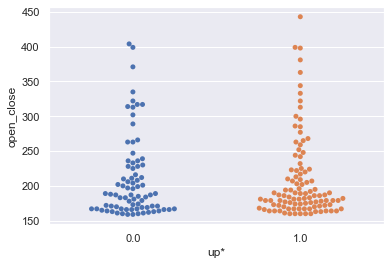

In [29]:
sns.swarmplot(x=big_drop['up*'], y=big_drop['open_close'])

### Anaylyse candles after a prior large rise in prices up to 15.9 pips in a minute open_close

In [31]:
big_rise = dataset[dataset["open_close"] < -159]
big_rise

,open_close,open_low,open_high,close_low,close_high,high_low,up*,down*,no_move*
143,-174.0,0.0,-193.0,174.0,-19.0,193.0,0.0,1.0,0.0
1841,-199.0,0.0,-214.0,199.0,-15.0,214.0,0.0,1.0,0.0
4430,-184.0,12.0,-187.0,196.0,-3.0,199.0,0.0,1.0,0.0
10489,-288.0,0.0,-289.0,288.0,-1.0,289.0,0.0,1.0,0.0
11942,-169.0,1.0,-226.0,170.0,-57.0,227.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
63926,-187.0,0.0,-212.0,187.0,-25.0,212.0,0.0,1.0,0.0
64245,-200.0,26.0,-226.0,226.0,-26.0,252.0,0.0,1.0,0.0
68573,-183.0,18.0,-229.0,201.0,-46.0,247.0,0.0,1.0,0.0
68578,-163.0,16.0,-201.0,179.0,-38.0,217.0,1.0,0.0,0.0


In [33]:
big_rise[["up*", "down*", "no_move*"]].value_counts()

up*  down*  no_move*
0.0  1.0    0.0         87
1.0  0.0    0.0         70
0.0  0.0    1.0          2
dtype: int64

From the information above we had 87 upward movement in price and 70 downward movement in price total <br/>
and 2 no move that is open and close are equal
candles = 87 + 70 + 2 = 159 <br/>
percentage up = (100 * 87)/(159) = 54.72% <br/>
percentage down = (100 * 70)/(159) = 44.02% <br/>
percentage no move = (100 * 2)/(159) = 1.26% <br/>
so after a 16 pips rise in price for a one minute time frame of EURUSD there was a 60.32% chance that the next candle would be bullish and 38.19% chance of a bearish candle and 1.58% chance open and close are equal

<AxesSubplot:xlabel='up*', ylabel='open_close'>

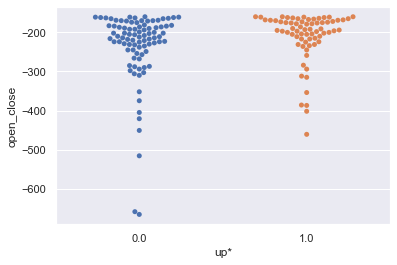

In [34]:
sns.swarmplot(x=big_rise['up*'], y=big_rise['open_close'])

# Bullish prior Patterns Analysis